<a href="https://colab.research.google.com/github/Bsyamsundar/Prostatexproject/blob/master/Prostatexproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

In [ ]:
def display_dicom_images(image_paths):
    for i in range(len(image_paths)):
        dicom_file = pydicom.dcmread(image_paths[i])
        image_data = dicom_file.pixel_array
        plt.figure(figsize=(5, 5))
        plt.imshow(image_data, cmap='gray')
        plt.title(f'Image {i+1}: {os.path.basename(image_paths[i])}')
        plt.axis('off')
        plt.show()


In [ ]:
base_dir = r"C:\Users\bsyam\Desktop\final project\manifest-hjL8tlLc1556886850502670511\PROSTATEx\ProstateX-0201"

In [ ]:
image_paths = []

In [ ]:
def collect_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.dcm'):
                image_paths.append(os.path.join(root, file))

In [ ]:
collect_images(base_dir)

In [ ]:
len(image_paths)

617

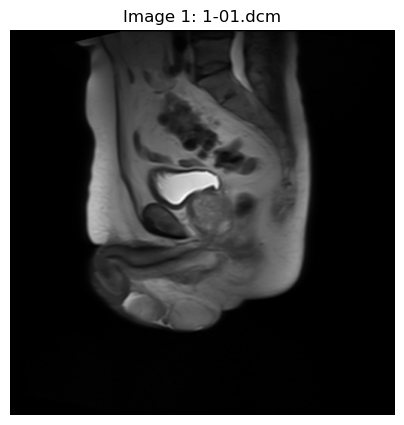

In [ ]:
display_dicom_images([image_paths[0]])

In [ ]:
import pandas as pd

findings_df = pd.read_csv(r'C:\Users\bsyam\Desktop\final project\ProstateX-Findings-Train.csv')
images_df = pd.read_csv(r'C:\Users\bsyam\Desktop\final project\ProstateX-Images-Train.csv')

In [ ]:
base_dir = r"C:\Users\bsyam\Desktop\final project\manifest-hjL8tlLc1556886850502670511\PROSTATEx"

In [ ]:
image_paths = []

In [ ]:
collect_images(base_dir)

In [ ]:
len(image_paths)

42117

In [ ]:
images_df.head()

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8


In [ ]:
images_df = images_df.drop(columns=['Name'])

In [ ]:
images_df = images_df.drop_duplicates()

In [ ]:
print("\nColumns in Images DataFrame:")
print(images_df.columns)


Columns in Images DataFrame:
Index(['ProxID', 'fid', 'pos', 'WorldMatrix', 'ijk', 'TopLevel',
       'SpacingBetweenSlices', 'VoxelSpacing', 'Dim', 'DCMSerDescr',
       'DCMSerNum'],
      dtype='object')


In [ ]:
merged_df = pd.merge(findings_df, images_df, on=['ProxID', 'pos'])

In [ ]:
def extract_prostatex_id(path):
    parts = path.split('\\')
    for part in parts:
        if part.startswith('ProstateX-'):
            return part
    return None

In [ ]:
def extract_dcm_image_num(path):
    filename = path.split('\\')[-1]
    dcm_image_num = filename.split('-')[-1].split('.')[0]
    return dcm_image_num

In [ ]:
def extract_dcmserdescr(path):
    parts = path.split('\\')
    series_num_part = parts[-2]
    dcm_series_num = series_num_part.split('-')[1]
    return dcm_series_num

In [ ]:
image_paths_df = pd.DataFrame(image_paths, columns=['image_path'])

In [ ]:
image_paths_df['ProxID'] = image_paths_df['image_path'].apply(extract_prostatex_id)
image_paths_df['DCMSerNum'] = image_paths_df['image_path'].apply(extract_dcm_image_num)

In [ ]:
image_paths_df['DCMSerDescr'] = image_paths_df['image_path'].apply(extract_dcmserdescr)

In [ ]:
image_paths_df.head()

,image_path,ProxID,DCMSerNum,DCMSerDescr
0,C:\Users\bsyam\Desktop\final project\manifest-...,ProstateX-0000,01,t2tsesag
1,C:\Users\bsyam\Desktop\final project\manifest-...,ProstateX-0000,02,t2tsesag
2,C:\Users\bsyam\Desktop\final project\manifest-...,ProstateX-0000,03,t2tsesag
3,C:\Users\bsyam\Desktop\final project\manifest-...,ProstateX-0000,04,t2tsesag
4,C:\Users\bsyam\Desktop\final project\manifest-...,ProstateX-0000,05,t2tsesag


In [ ]:
merged_df['DCMSerNum'] = merged_df['DCMSerNum'].astype(str)
image_paths_df['DCMSerNum'] = image_paths_df['DCMSerNum'].astype(str)

In [ ]:
merged_df['DCMSerDescr'] = merged_df['DCMSerDescr'].str.lower()
image_paths_df['DCMSerDescr'] = image_paths_df['DCMSerDescr'].str.lower()

In [ ]:
merged_df['DCMSerDescr'] = merged_df['DCMSerDescr'].str.lower().str.strip()
image_paths_df['DCMSerDescr'] = image_paths_df['DCMSerDescr'].str.lower().str.strip()

In [ ]:
merged_df2 = pd.merge(merged_df, image_paths_df, on=['ProxID', 'DCMSerNum', 'DCMSerDescr'], how='left')

In [ ]:
merged_df['DCMSerNum'] = merged_df['DCMSerNum'].astype(int).astype(str).str.zfill(2)
image_paths_df['DCMSerNum'] = image_paths_df['DCMSerNum'].astype(str).str.zfill(2)

In [ ]:
merged_df['DCMSerDescr'] = merged_df['DCMSerDescr'].str.replace('_', '').str.lower()
image_paths_df['DCMSerDescr'] = image_paths_df['DCMSerDescr'].str.replace('_', '').str.lower()

In [ ]:
merged_df3 = pd.merge(merged_df, image_paths_df, on=['ProxID', 'DCMSerNum', 'DCMSerDescr'], how='left')

In [ ]:
import os
import shutil
import zipfile
from sklearn.model_selection import train_test_split
import pandas as pd
import pydicom
import numpy as np
from PIL import Image

In [ ]:
def dicom_to_png(dicom_path, png_path):
    dicom_file = pydicom.dcmread(dicom_path)
    image_array = dicom_file.pixel_array
    image = Image.fromarray(image_array)
    image.save(png_path)

In [ ]:
merged_df3 = merged_df3[merged_df3['image_path'].notnull()]

In [ ]:
output_dir = r"C:\Users\bsyam\Desktop\final project\prostatex_images"

In [ ]:
class_0_dir = os.path.join(output_dir, "class_0")
class_1_dir = os.path.join(output_dir, "class_1")

In [ ]:
os.makedirs(class_0_dir, exist_ok=True)
os.makedirs(class_1_dir, exist_ok=True)

In [ ]:
def copy_and_convert_image(image_path, destination_dir):
    if isinstance(image_path, str) and os.path.exists(image_path):
        base_filename = os.path.basename(image_path).replace('.dcm', '.png')
        destination_path = os.path.join(destination_dir, base_filename)
        dicom_to_png(image_path, destination_path)
        return destination_path
    return None

In [ ]:
valid_paths = []

In [ ]:
for idx, row in merged_df3.iterrows():
    image_path = row['image_path']
    ClinSig = row['ClinSig']

    if ClinSig == 0:
        valid_path = copy_and_convert_image(image_path, class_0_dir)
    else:
        valid_path = copy_and_convert_image(image_path, class_1_dir)

    if valid_path:
        valid_paths.append((valid_path, ClinSig))

In [ ]:
valid_df = pd.DataFrame(valid_paths, columns=['image_path', 'label'])

In [ ]:
valid_df.head()

,image_path,label
0,C:\Users\bsyam\Desktop\final project\prostatex...,True
1,C:\Users\bsyam\Desktop\final project\prostatex...,True
2,C:\Users\bsyam\Desktop\final project\prostatex...,True
3,C:\Users\bsyam\Desktop\final project\prostatex...,True
4,C:\Users\bsyam\Desktop\final project\prostatex...,True


In [ ]:
valid_df

,image_path,label
0,C:\Users\bsyam\Desktop\final project\prostatex...,True
1,C:\Users\bsyam\Desktop\final project\prostatex...,True
2,C:\Users\bsyam\Desktop\final project\prostatex...,True
3,C:\Users\bsyam\Desktop\final project\prostatex...,True
4,C:\Users\bsyam\Desktop\final project\prostatex...,True
...,...,...
3691,C:\Users\bsyam\Desktop\final project\prostatex...,True
3692,C:\Users\bsyam\Desktop\final project\prostatex...,True
3693,C:\Users\bsyam\Desktop\final project\prostatex...,True
3694,C:\Users\bsyam\Desktop\final project\prostatex...,True


In [ ]:
valid_df['label'] = valid_df['label'].astype(int)

In [ ]:
valid_df

,image_path,label
0,C:\Users\bsyam\Desktop\final project\prostatex...,1
1,C:\Users\bsyam\Desktop\final project\prostatex...,1
2,C:\Users\bsyam\Desktop\final project\prostatex...,1
3,C:\Users\bsyam\Desktop\final project\prostatex...,1
4,C:\Users\bsyam\Desktop\final project\prostatex...,1
...,...,...
3691,C:\Users\bsyam\Desktop\final project\prostatex...,1
3692,C:\Users\bsyam\Desktop\final project\prostatex...,1
3693,C:\Users\bsyam\Desktop\final project\prostatex...,1
3694,C:\Users\bsyam\Desktop\final project\prostatex...,1


In [ ]:
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

In [ ]:
train_df, val_df = train_test_split(valid_df, test_size=0.2, random_state=42, stratify=valid_df['label'])

In [ ]:
# Check class distribution
print("Training set class distribution:")
print(train_df['label'].value_counts(normalize=True))

print("\nValidation set class distribution:")
print(val_df['label'].value_counts(normalize=True))

Training set class distribution:
label
0    0.675237
1    0.324763
Name: proportion, dtype: float64

Validation set class distribution:
label
0    0.675676
1    0.324324
Name: proportion, dtype: float64


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create TensorFlow datasets from the DataFrame
train_ds = tf.data.Dataset.from_tensor_slices((train_df['image_path'].values, train_df['label'].values))
val_ds = tf.data.Dataset.from_tensor_slices((val_df['image_path'].values, val_df['label'].values))

In [ ]:
# Map the load_and_preprocess_image function to the dataset
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [ ]:
# Shuffle, batch, and prefetch
train_ds = train_ds.shuffle(buffer_size=1024).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
# Define the model
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

In [ ]:
# Calculate class weights
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)
class_weights = dict(enumerate(class_weights))

# Print computed class weights
print("Class weights:", class_weights)

# Train the model with class weights
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    class_weight=class_weights
)


Class weights: {0: 0.7404809619238477, 1: 1.5395833333333333}
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.8733 - loss: 7.9289 - precision: 0.7682 - recall: 0.8661 - val_accuracy: 0.3243 - val_loss: 11.9338 - val_precision: 0.3243 - val_recall: 1.0000 - learning_rate: 5.0000e-05
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.8789 - loss: 6.1413 - precision: 0.7812 - recall: 0.8606 - val_accuracy: 0.3243 - val_loss: 10.7588 - val_precision: 0.3243 - val_recall: 1.0000 - learning_rate: 5.0000e-05
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8959 - loss: 5.0507 - precision: 0.8408 - recall: 0.8381 - val_accuracy: 0.3243 - val_loss: 8.8813 - val_precision: 0.3243 - val_recall: 1.0000 - learning_rate: 5.0000e-05
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9098 - loss: 4.1538 - precision: 0.8818 - recall: 0.8275 - val_accuracy: 0.3243 - val_loss: 7.5890 - val_precision: 0.3243 - val_recall: 1.0000 - learning_rate:

In [ ]:
# Print the keys of history to see all the metrics recorded
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall', 'learning_rate'])


In [ ]:
last_epoch = len(history.history['accuracy']) - 1

print("Final Metrics after Training:")
print(f"  Accuracy: {history.history['accuracy'][last_epoch]}")
print(f"  Validation Accuracy: {history.history['val_accuracy'][last_epoch]}")
print(f"  Loss: {history.history['loss'][last_epoch]}")
print(f"  Validation Loss: {history.history['val_loss'][last_epoch]}")
print(f"  Precision: {history.history['precision'][last_epoch]}")
print(f"  Validation Precision: {history.history['val_precision'][last_epoch]}")
print(f"  Recall: {history.history['recall'][last_epoch]}")
print(f"  Validation Recall: {history.history['val_recall'][last_epoch]}")


Final Metrics after Training:
  Accuracy: 0.8941136598587036
  Validation Accuracy: 0.8270270228385925
  Loss: 0.8316928744316101
  Validation Loss: 0.7554700970649719
  Precision: 0.8218905329704285
  Validation Precision: 0.6609195470809937
  Recall: 0.8604166507720947
  Validation Recall: 0.9583333134651184


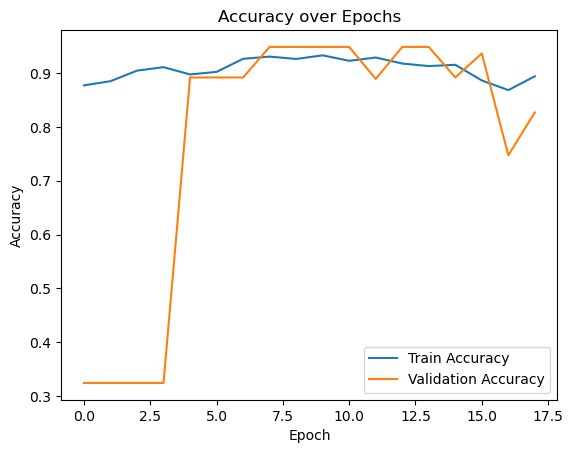

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

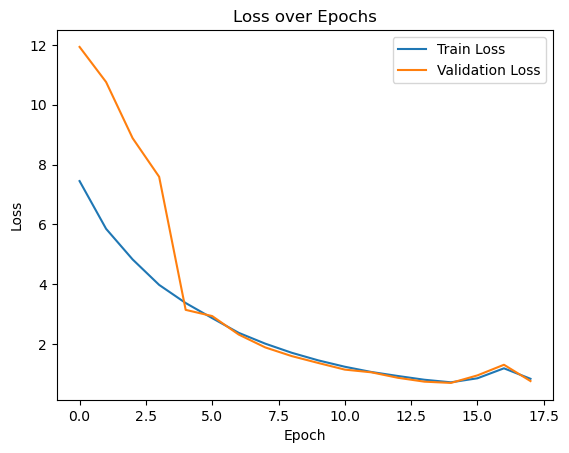

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

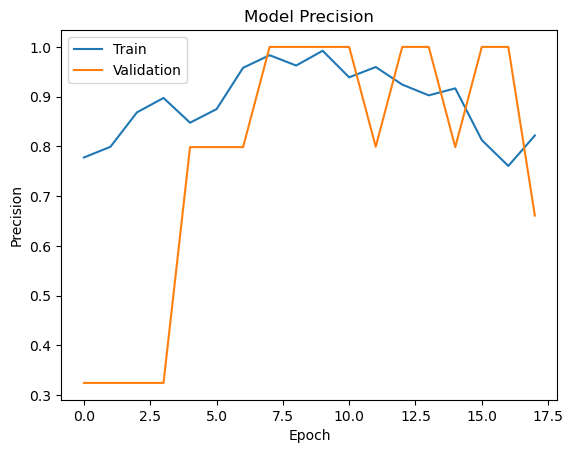

In [ ]:
# Plot training & validation precision values
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


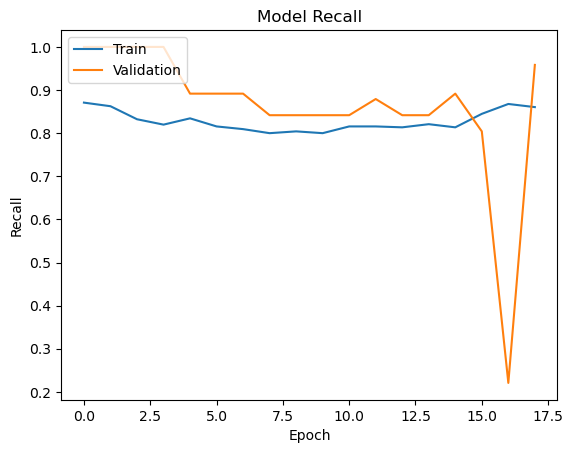

In [ ]:
# Plot training & validation recall values
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
